In [126]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

In [127]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Github\VarianceArithmetic\IPyNb


In [128]:
df = pd.read_csv("../Python/Output/NormalMomentum_5_var.txt", sep='\t')
df.head()

,Order,Value,Uncertainty
0,0,0.999999,9.280575e-17
1,1,0.000000,4.940656e-324
2,2,0.999985,9.280575e-17
3,3,0.000000,4.940656e-324
4,4,2.999582,2.661649e-16


In [130]:
df = df[(df['Order'] % 2) == 0]

In [134]:
df['Asymptotic'] = 2*sp.stats.norm.pdf(5) *5.0**(df["Order"] + 1)/(df["Order"] + 1)
df['Ratio'] = df['Asymptotic'] / df['Value']

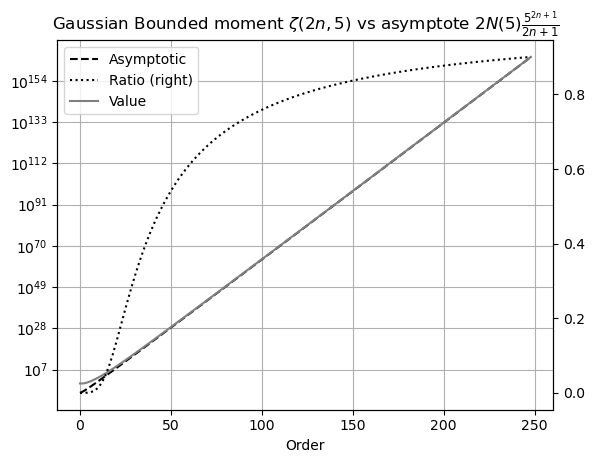

In [136]:
ax = df.plot(x='Order', y='Asymptotic', style='k--')
ax2 = df.plot(ax=ax, x='Order', y='Ratio', secondary_y=True, style='k:')
df.plot(ax=ax, x='Order', y='Value', c='gray', ls='-', grid=True, logy=True, legend='Gaussian', 
            title=r'Gaussian Bounded moment $\zeta(2n, 5)$ vs asymptote $2N(5) \frac{5^{2n+1}}{2n+1}$')
ax2.ylim=(0,1)